# L4: Process Inputs: Chain of Thought Reasoning

## Setup


In [2]:
# 구글 코립일 경우
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [3]:
import os
import openai

from openai import OpenAI
from google.colab import userdata

client = OpenAI(
    api_key=userdata.get('OPENAI_API_KEY')
)

In [4]:
def get_completion_from_messages(messages,
                                 model="gpt-3.5-turbo",
                                 temperature=0,
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens, # 모델이 출력하는 최대 토큰
    )

    return response.choices[0].message.content


## Chain-of-Thought사고의 연쇄 Prompting

- Chain-of-Thought Prompting Elicits Reasoning in Large Language Models(Jan. 10. 2023)

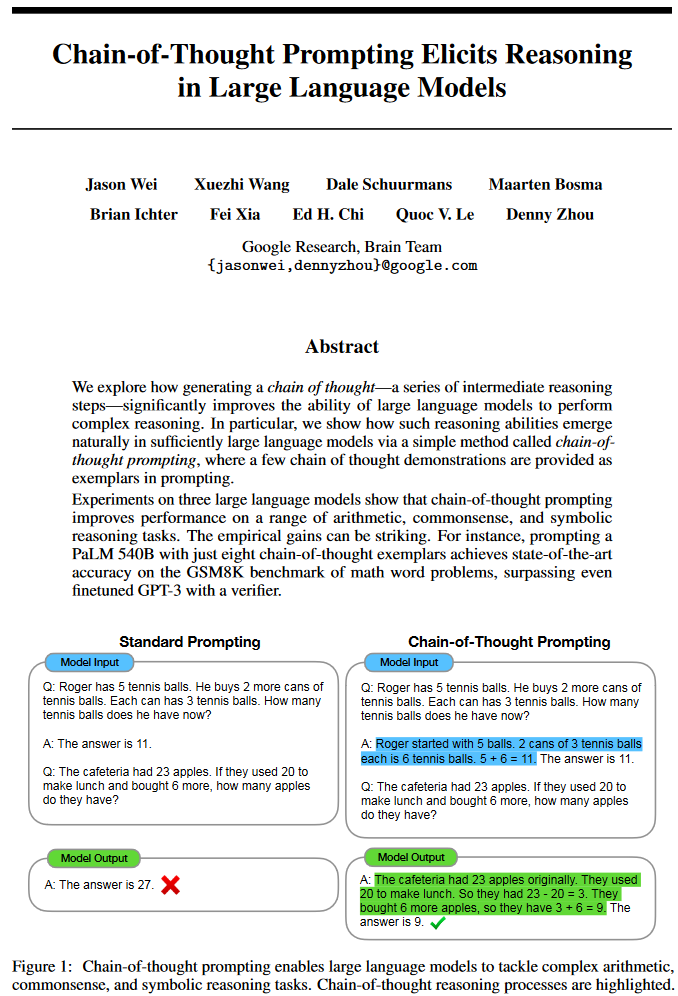

In [18]:
delimiter = "####"

system_message = f"""
Answer the user message.
The user message will be delimited with four hashtags, i.e. {delimiter}.
"""

user_message = f"""
Q: Roger has 5 tennis bools.
He buys 2 more cans of tennis balls.
Each can has 3 tennis balls.
How many tennis balls does he have now?

A: The answer is 11.

Q: The cafeteria has 23 apples.
If they used 20 to make lunch and bought 6 more.
How many apples do they have?
"""

messages =  [
{'role':'system',
 'content': system_message},
{'role':'user',
 'content': f"{delimiter}{user_message}{delimiter}"},
]

# 2023.12.26 현재 모두 잘 맞춤
response = get_completion_from_messages(messages)
print(response)

A: The cafeteria now has 9 apples.


In [15]:
user_message = f"""
Q: Roger has 5 tennis bools.
He buys 2 more cans of tennis balls.
Each can has 3 tennis balls.
How many tennis balls does he have now?

A: Roger started with 5 balls,
2 cans of 3 tennis balls each is 6 tennis balls.
5 + 6 = 11.
The answer is 11.

Q: The cafeteria has 23 apples.
If they used 20 to make lunch and bought 6 more.
How many apples do they have?
"""

messages =  [
{'role':'system',
 'content': system_message},
{'role':'user',
 'content': f"{delimiter}{user_message}{delimiter}"},
]

# 2023.12.26 현재 모두 잘 맞춤
response = get_completion_from_messages(messages)
print(response)

A: The cafeteria started with 23 apples.
They used 20 apples for lunch, so they have 23 - 20 = 3 apples left.
Then they bought 6 more apples.
3 + 6 = 9.
The cafeteria now has 9 apples.


In [19]:
delimiter = "####"

system_message = f"""
다음 단계에 따라 고객 문의에 답변합니다.
고객 문의는 4개의 해시태그({delimiter})로 구분됩니다.

Step 1: 먼저 사용자가 특정 제품에 대해 질문하는 것인지 결정합니다.
제품 카테고리는 중요하지 않습니다.

Step 2: 사용자가 특정 제품에 대해 문의하는 경우 제품이 다음 목록에 있는지 확인합니다.
모든 제품 목록:
1. 제품: TechPro Ultrabook
   카테고리: 컴퓨터, 랩탑
   브랜드: TechPro
   모델 번호: TP-UB100
   보증기간: 1 year
   별점: 4.5
   스펙: 13.3-inch display, 8GB RAM, 256GB SSD, Intel Core i5 processor
   설명: 일상적인 사용을 위한 세련되고 가벼운 울트라북입니다.
   가격: 120만원

2. 제품: BlueWave Gaming Laptop
   카테고리: 컴퓨터, 랩탑
   브랜드: BlueWave
   모델 번호: BW-GL200
   보증기간: 2 years
   별점: 4.품
   스펙: 15.6-inch display, 16GB RAM, 512GB SSD, NVIDIA GeForce RTX 3060
   설명: 몰입감 넘치는 경험을 위한 고성능 게이밍 노트북.
   가격: 150만원

3. 제품: PowerLite Convertible
   카테고리: 컴퓨터, 랩탑
   브랜드: PowerLite
   모델 번호: PL-CV300
   보증기간: 1 year
   별점: 4.3
   스펙: 14-inch touchscreen, 8GB RAM, 256GB SSD, 360-degree hinge
   설명: 반응형 터치스크린이 탑재된 다용도 컨버터블 노트북입니다.
   가격: 80만원

4. 제품: TechPro Desktop
   카테고리: 컴퓨터, 랩탑
   브랜드: TechPro
   모델 번호: TP-DT500
   보증기간: 1 year
   별점: 4.4
   스펙: Intel Core i7 processor, 16GB RAM, 1TB HDD, NVIDIA GeForce GTX 1660
   설명: 업무와 여가를 위한 강력한 데스크톱 컴퓨터.
   가격: 120만원

5. 제품: BlueWave Chromebook
   카테고리: 컴퓨터, 랩탑
   브랜드: BlueWave
   모델 번호: BW-CB100
   보증기간: 1 year
   별점: 4.1
   스펙: 11.6-inch display, 4GB RAM, 32GB eMMC, Chrome OS
   설명: 일상적인 작업을 위한 작고 경제적인 크롬북입니다.
   가격: 43만원

Step 3: 메시지에 위 목록에 있는 제품이 포함되어 있는 경우
사용자가 메시지에서 가정하고 있는 모든 가정을 나열합니다
(예: 노트북 X가 노트북 Y보다 크거나, 노트북 Z에 2년 보증이 적용된다고 가정하는 등)

Step 4: 사용자가 어떤 가정을 한 경우 제품 정보를 기반으로
그 가정이 사실인지 파악합니다.

Step 5: 먼저 고객의 잘못된 가정에 해당하는 경우 가능하다면 정중하게 바로잡습니다.
스토어에서 판매하는 제품은 5개뿐이므로 사용 가능한 5개 제품 목록에 있는 제품만 언급하거나 참조합니다.
친절한 어조로 고객에게 응답합니다.

다음 형식을 사용합니다:
Step 1:{delimiter} <step 1 reasoning>
Step 2:{delimiter} <step 2 reasoning>
Step 3:{delimiter} <step 3 reasoning>
Step 4:{delimiter} <step 4 reasoning>
Response to user:{delimiter} <response to customer>

모든 단계를 {delimiter}로 반드시 구분해야 합니다.
"""

In [20]:
user_message = f"""BlueWave Chromebook이 TechPro Desktop보다 얼마나 더 비쌉니까?"""

messages =  [
    {'role':'system', 'content': system_message},
    {'role':'user', 'content': f"{delimiter}{user_message}{delimiter}"},
]

response = get_completion_from_messages(messages, model='gpt-4')
print(response)

Step 1:#### 사용자는 특정 제품에 대해 질문하고 있습니다. 여기서 제품은 BlueWave Chromebook과 TechPro Desktop입니다.

Step 2:#### 제품 목록을 확인하면 BlueWave Chromebook과 TechPro Desktop이 모두 목록에 있습니다.

Step 3:#### 사용자는 BlueWave Chromebook이 TechPro Desktop보다 비싸다고 가정하고 있습니다.

Step 4:#### 제품 정보를 확인하면, BlueWave Chromebook의 가격은 43만원이고, TechPro Desktop의 가격은 120만원입니다. 따라서 사용자의 가정은 잘못되었습니다.

Response to user:#### BlueWave Chromebook이 TechPro Desktop보다 비싸지 않습니다. 실제로, BlueWave Chromebook은 43만원이고, TechPro Desktop은 120만원입니다. 따라서 TechPro Desktop이 BlueWave Chromebook보다 비쌉니다.


In [22]:
user_message = f"""TV를 살수 있을 까요?"""

messages =  [
    {'role':'system', 'content': system_message},
    {'role':'user', 'content': f"{delimiter}{user_message}{delimiter}"},
]

response = get_completion_from_messages(messages, model='gpt-4')
print(response)

Step 1:#### 사용자는 특정 제품에 대해 질문하고 있습니다. 그러나 그 제품은 TV로, 우리가 판매하는 제품 범주에 속하지 않습니다.
Step 2:#### 사용자가 문의한 제품(TV)는 우리가 판매하는 제품 목록에 없습니다. 우리는 컴퓨터와 랩탑만 판매하고 있습니다.
Step 3:#### 사용자의 메시지에서는 가정이 없습니다. 그저 TV를 구매할 수 있는지 물어보고 있습니다.
Step 4:#### 사용자가 TV를 구매할 수 있는지 물어보았지만, 우리는 TV를 판매하지 않으므로 이 가정은 사실이 아닙니다.
Response to user:#### 죄송합니다, 저희는 현재 컴퓨터와 랩탑만 판매하고 있습니다. TV는 판매하고 있지 않습니다. 다른 제품에 대해 궁금한 점이 있으시다면 언제든지 문의해 주세요. 감사합니다.


## Inner Monologue
- 위 출력에서 Step1~Step4까지는 내부적으로 일어나는 일이므로 최총 출력에서 감춰져야 함.

- LLM에 구분 기호로 추론 단계를 구분하도록 요청했기 때문에 다음 처럼 간단하게 모델의 출력을 필터링 할 수 있음

In [23]:
try:
    final_response = response.split(delimiter)[-1].strip()
except Exception as e:
    final_response = "죄송합니다, 지금 문제가 발생하고 있습니다. 다른 질문을 해보세요."

print(final_response)

죄송합니다, 저희는 현재 컴퓨터와 랩탑만 판매하고 있습니다. TV는 판매하고 있지 않습니다. 다른 제품에 대해 궁금한 점이 있으시다면 언제든지 문의해 주세요. 감사합니다.
